# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.stats import zscore


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [100]:
# laptop ku gk kuat cuy data aslinya 400k :)
df = pd.read_csv('./Dataset_inisiasi.csv')
df = df.sample(n=100000,random_state=1)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [101]:
print("Statistik Deskriptif pada data ", df.head())
print("Jumlah Kolom dan Baris pada Data: ", df.shape)

Statistik Deskriptif pada data                      Name  Age Marital Status    Education Level  \
140658     Phillip Mills   42       Divorced  Bachelor's Degree   
344718     Kevin Jenkins   66        Married        High School   
143305     Patrick Floyd   45        Married        High School   
301815  Mr. Justin Clark   79        Married  Bachelor's Degree   
249776  Dwayne Maldonado   67        Married   Associate Degree   

        Number of Children Smoking Status Physical Activity Level  \
140658                   3         Former                Moderate   
344718                   1     Non-smoker               Sedentary   
143305                   0         Former               Sedentary   
301815                   1         Former               Sedentary   
249776                   1     Non-smoker                Moderate   

       Employment Status    Income Alcohol Consumption Dietary Habits  \
140658          Employed  79745.66                 Low        Healthy   
3447

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 140658 to 119838
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          100000 non-null  object 
 1   Age                           100000 non-null  int64  
 2   Marital Status                100000 non-null  object 
 3   Education Level               100000 non-null  object 
 4   Number of Children            100000 non-null  int64  
 5   Smoking Status                100000 non-null  object 
 6   Physical Activity Level       100000 non-null  object 
 7   Employment Status             100000 non-null  object 
 8   Income                        100000 non-null  float64
 9   Alcohol Consumption           100000 non-null  object 
 10  Dietary Habits                100000 non-null  object 
 11  Sleep Patterns                100000 non-null  object 
 12  History of Mental Illness     100000 non-nul

In [103]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"Kolom: {col}")
    print(df[col].value_counts())  # Menampilkan jenis object unik dan jumlahnya
    print("-" * 50)  # Pembatas antar kolom

Kolom: Name
Name
Michael Smith        39
Michael Johnson      37
David Williams       35
John Smith           33
David Smith          33
                     ..
Nicole Shields        1
Lauren Le             1
Danielle Pearson      1
Christina Ellison     1
Kari Wheeler          1
Name: count, Length: 71077, dtype: int64
--------------------------------------------------
Kolom: Marital Status
Marital Status
Married     58257
Single      17293
Widowed     16423
Divorced     8027
Name: count, dtype: int64
--------------------------------------------------
Kolom: Education Level
Education Level
Bachelor's Degree    30156
High School          28629
Associate Degree     19295
Master's Degree      17881
PhD                   4039
Name: count, dtype: int64
--------------------------------------------------
Kolom: Smoking Status
Smoking Status
Non-smoker    59797
Former        28158
Current       12045
Name: count, dtype: int64
--------------------------------------------------
Kolom: Physical 

In [104]:
missing_values = df.isnull().sum()
print("Missing Values pada Data: ", missing_values)

Missing Values pada Data:  Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64


In [105]:
df.describe()

,Age,Number of Children,Income
count,100000.000000,100000.000000,100000.000000
mean,49.031770,1.299240,50548.323063
std,18.172198,1.236629,40583.059236
min,18.000000,0.000000,0.580000
25%,33.000000,0.000000,20866.230000
50%,49.000000,1.000000,37476.670000
75%,65.000000,2.000000,76411.010000
max,80.000000,4.000000,209896.840000


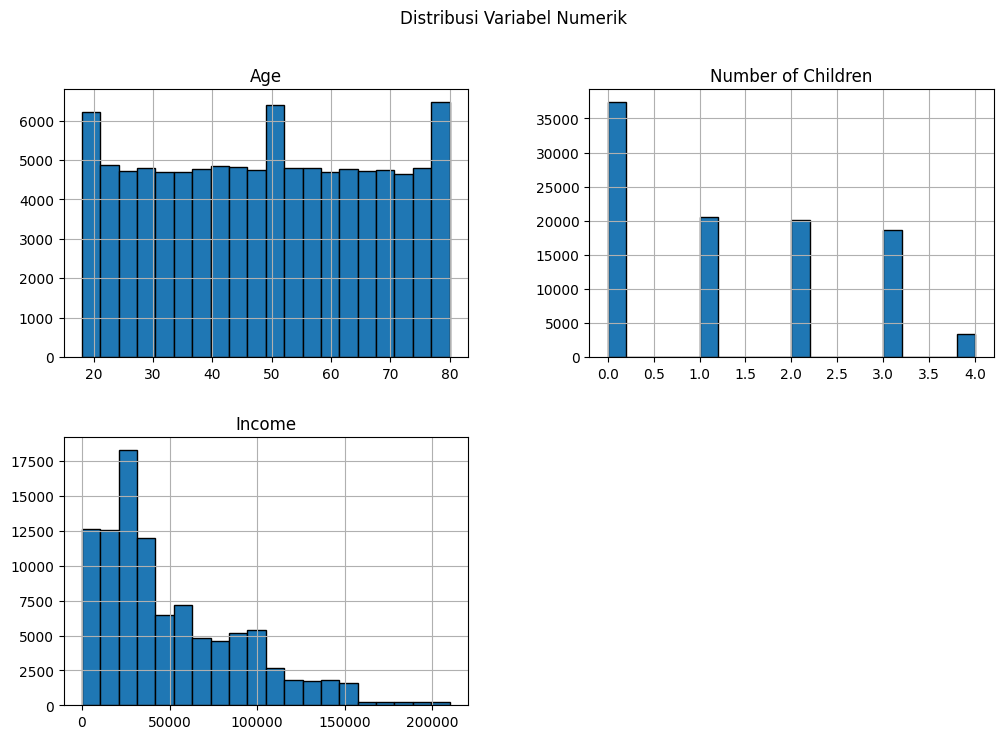

In [106]:
df.hist(figsize=(12, 8),bins=20,edgecolor='black')
plt.suptitle("Distribusi Variabel Numerik")
plt.show()

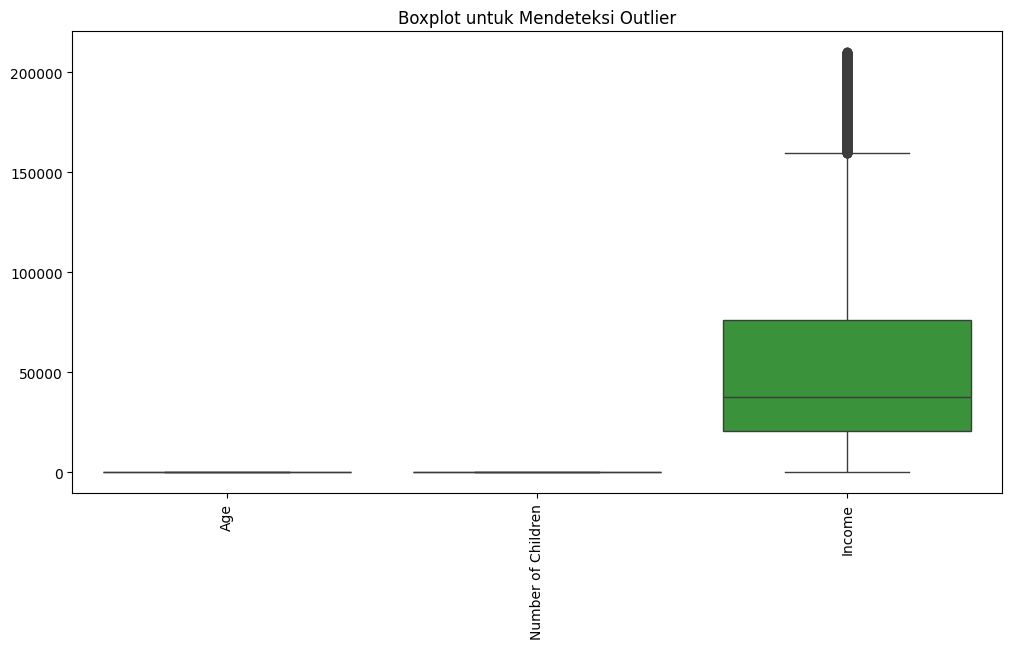

In [107]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot untuk Mendeteksi Outlier")
plt.xticks(rotation=90)
plt.show()

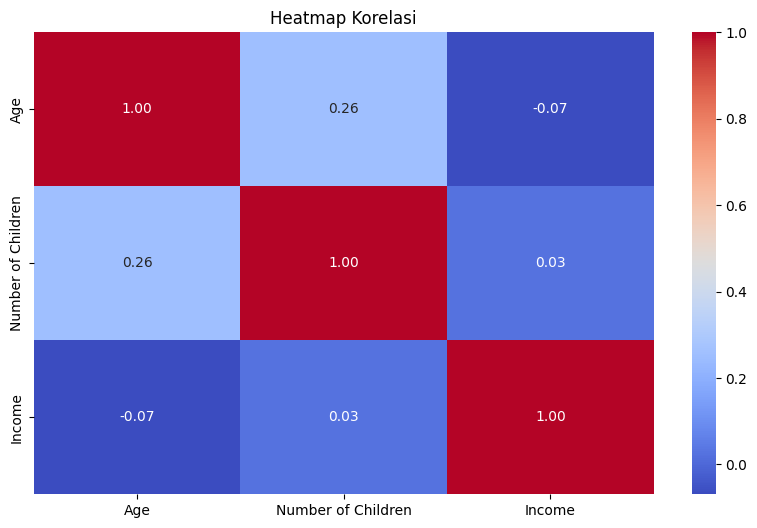

In [108]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt='.2f') # Select only numeric columns for correlation
plt.title("Heatmap Korelasi")
plt.show()

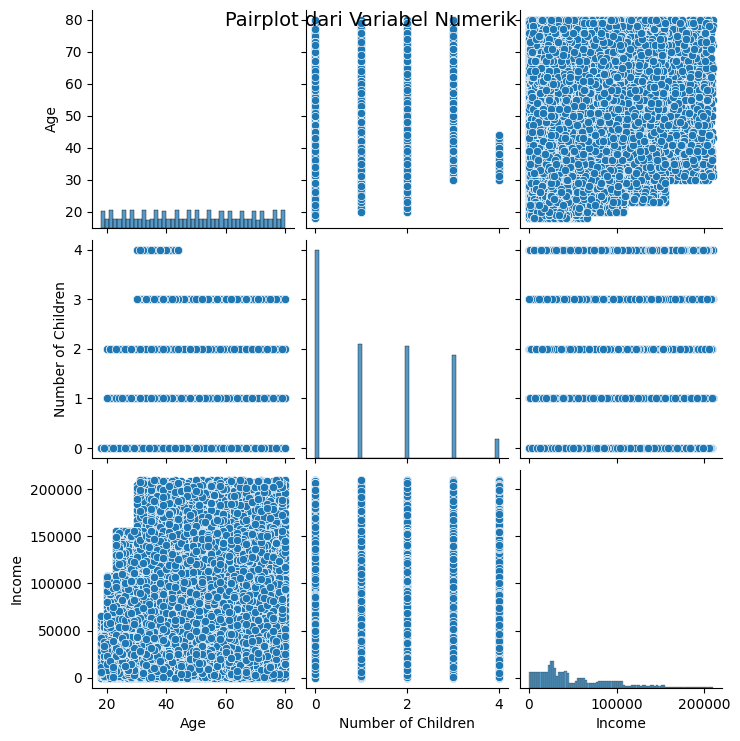

In [109]:
# Pairplot untuk melihat hubungan antar variabel
num_cols = df.select_dtypes(include=np.number).columns
sns.pairplot(df[num_cols])
plt.suptitle("Pairplot dari Variabel Numerik", fontsize=14)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [110]:
df.duplicated().sum()

np.int64(0)

In [111]:
# Mengatasi missing values
df = df.dropna()

In [112]:
not_relevant_cols = ['Name']
df = df.drop(columns=[col for col in not_relevant_cols if col in df.columns], errors="ignore")

In [113]:
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [114]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=['number']))

In [ ]:
z_scores = np.abs(zscore(df_scaled))
mask = (z_scores < 3).all(axis=1)
df_scaled = df_scaled[mask]

df = df.iloc[mask.nonzero()[0]]

In [116]:
bins = [0, 18, 35, 50, 65, float('inf')]
labels = ['Remaja', 'Dewasa Muda', 'Dewasa', 'Paruh Baya', 'Lansia']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [117]:
n = 4
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

kmeans = KMeans(n_clusters=n, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_pca)

print("Cluster Labels:\n", df['Cluster'].value_counts())

unique_clusters = df["Cluster"].unique()
print("Cluster yang ditemukan dalam data:", unique_clusters)


Cluster Labels:
 Cluster
1    32840
3    25838
0    25006
2    15422
Name: count, dtype: int64
Cluster yang ditemukan dalam data: [1 0 3 2]


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

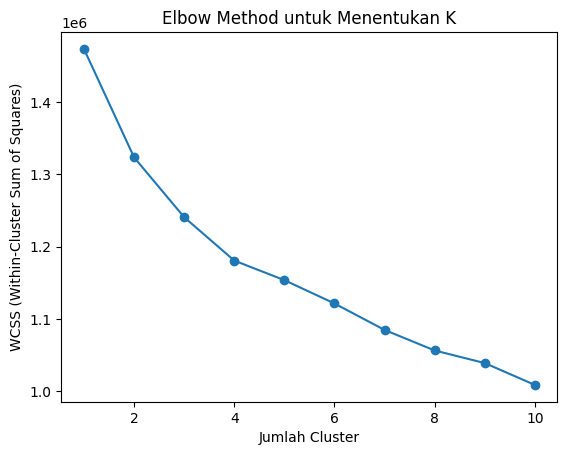

In [118]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method untuk Menentukan K')
plt.show()

In [ ]:
# Evaluasi clustering
sil_score = silhouette_score(df_scaled, df['Cluster'])
print(f'Silhouette Score: {sil_score:.4f}')

n_features = df_scaled.shape[1]
k_best = 4
selec

Silhouette Score: 0.0702


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [131]:
df_numeric = df.select_dtypes(include=['number'])

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_numeric)
k=4
n_features = df_scaled.shape[1]
selector = SelectKBest(score_func=f_classif, k=k)
df_selected = selector.fit_transform(df_scaled, KMeans(n_clusters=4).fit_predict(df_scaled))

n_features_after = df_selected.shape[1]
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_selected)
# sebelum feature selection
kmeans_before = KMeans(n_clusters=4, random_state=42)
labels_before = kmeans_before.fit_predict(df_scaled)
silhouette_score_before = silhouette_score(df_scaled, labels_before)

# setelah feature selection
kmeans_after = KMeans(n_clusters=4, random_state=42)
labels_after = kmeans_after.fit_predict(df_pca)
silhouette_score_after = silhouette_score(df_pca, labels_after)

print(f"Jumlah fitur sebelum Feature Selection: {n_features}")
print(f"Jumlah fitur setelah Feature Selection: {n_features_after}")
print(f'Silhouette Score sebelum feature selection: {silhouette_score_before:.4f}')
print(f'Silhouette Score setelah feature selection: {silhouette_score_after:.4f}')
if silhouette_score_after > silhouette_score_before:
    print("Selection feature is working")
else:
    print("Selection feature is not working")

KeyboardInterrupt: 

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [121]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [122]:
# Type your code here


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [123]:
# Type your code here

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [124]:
# Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.